# Naive Bayes Classiffier

## TEORİ

**Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.**

Makine öğreniminde Naive Bayes sınıflandırması, sınıflandırma görevi için basit ve güçlü bir algoritmadır. Naive Bayes sınıflandırması, özellikler arasında güçlü bağımsızlık varsayımı ile Bayes teoreminin uygulanmasına dayanmaktadır. Naive Bayes sınıflandırması, Doğal Dil İşleme gibi metinsel veri analizi için kullandığımızda iyi sonuçlar verir.

Naive Bayes Türleri,
1. Gaussian Naive Bayes
2. Multinominal Naive Bayes
3. Bernoulli Naive Bayes

Naive Bayes Algoritma Uygulamaları,
* Spam filtreleme
* Metin sınıflandırması
* Duygu analizi
* Tavsiye sistemleri

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabets = pd.read_csv(url)
df = diabets.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


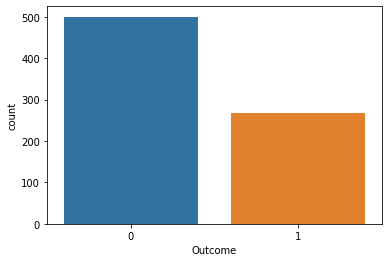

In [6]:
sns.countplot(df['Outcome']);

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
nb = GaussianNB().fit(X_train, y_train)
nb

GaussianNB()

In [9]:
?nb

Type:        GaussianNB
String form: GaussianNB()
File:        ~/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py
Docstring:  
Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training samples observed in each class.

cla

### Tahminleme

In [10]:
nb.predict_proba(X_test)[0:10] # olasılık degerleri (sol:0, sag:1)

array([[0.73024358, 0.26975642],
       [0.93694781, 0.06305219],
       [0.96883655, 0.03116345],
       [0.81484811, 0.18515189],
       [0.45359983, 0.54640017],
       [0.47969286, 0.52030714],
       [0.9953342 , 0.0046658 ],
       [0.42790476, 0.57209524],
       [0.55501839, 0.44498161],
       [0.22964228, 0.77035772]])

In [11]:
nb.predict(X_test)[0:10] # tahmin degerleri

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
y_pred = nb.predict(X_test)
score = accuracy_score(y_test, y_pred) # dogruluk skoru
score

0.7662337662337663

In [14]:
cross_val_score(nb, X_test, y_test, cv = 10, scoring = 'accuracy').mean() # caprazlanma dogruluk skoru

0.8054166666666667

In [15]:
print(f"Modelin orjinal dogruluk skoru: {score}")

Modelin orjinal dogruluk skoru: 0.7662337662337663


In [16]:
# confusion matrix degerleri
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[79 20]
 [16 39]]
True Positives(TP) =  79
True Negatives(TN) =  39
False Positives(FP) =  20
False Negatives(FN) =  16


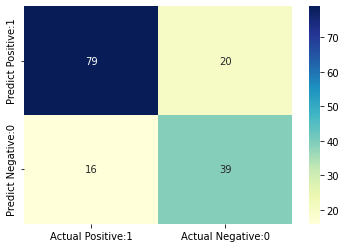

In [17]:
cm_matrix = pd.DataFrame(data = cm, 
                        columns=['Actual Positive:1', 'Actual Negative:0'], 
                        index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

In [18]:
# dogruluk skorunun manuel olarak elde edilmesi
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

dogSkoru = (TP + TN) / float(TP + TN + FP + FN)

print(f"Manuel olarak elde edilen dogruluk skoru: {dogSkoru}")

Manuel olarak elde edilen dogruluk skoru: 0.7662337662337663


In [19]:
score == dogSkoru

True

In [20]:
# sınıflandırma hata skoru
hataSkoru = (FP + FN) / float(TP + TN + FP + FN)

print('Hata skoru: {0:0.4f}'.format(hataSkoru))

Hata skoru: 0.2338


In [21]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [22]:
# tahmin degerlerinin olaslıklarının dataframe dönüstürülmesi
predProba = nb.predict_proba(X_test)[0:10]

predProba_df = pd.DataFrame(data = predProba, columns = ['Prob of 0', 'Prrob of 1'])
predProba_df

,Prob of 0,Prrob of 1
0,0.730244,0.269756
1,0.936948,0.063052
2,0.968837,0.031163
3,0.814848,0.185152
4,0.453600,0.546400
5,0.479693,0.520307
6,0.995334,0.004666
7,0.427905,0.572095
8,0.555018,0.444982
9,0.229642,0.770358


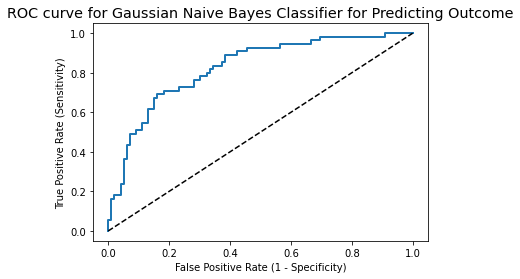

In [23]:
# ROC curve

y_pred1 = nb.predict_proba(X_test)[:, 1] # 1 olma olasılık degerleri

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Outcome')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [24]:
# ROC AUC - egri altındaki alan hesabı (en iyi deger: 1)
roc_ouc = roc_auc_score(y_test, y_pred1)
print('ROC AUC (Alan degeri): {:.4f}'.format(roc_ouc))

ROC AUC (Alan degeri): 0.8253


In [25]:
# caprazlama ile alan degerinin hesaplanması
cv_RocAuc = cross_val_score(nb, X_train, y_train, cv = 10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(cv_RocAuc))

Cross validated ROC AUC : 0.8101


## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Gauss Naive Bayes Sınıflandırıcı modeli kullanıldı.
* Modelin orjinal dogruluk skoru: **0.7662337662337663**